In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
figdir="/data/Phillippy/projects/HG002_Masseq/figure"

In [3]:
df0= pd.read_csv("/vf/users/Phillippy/projects/HG002_Masseq/05.mergeGFF/chm13.vs.chm13/5.1_merge_woUCSC/chm13v2.0.curated.refseq.tracking",
                sep ="\t",
                header = None)
df0.head()

,0,1,2,3,4,5
0,TCONS_00000001,XLOC_000001,-,u,q1:LOC124905335_1|XR_007068557.1_1|2|0.000000|...,-
1,TCONS_00000002,XLOC_000002,-,u,q1:LINC01409|XR_007065319.1|2|0.000000|0.00000...,q2:gene-LINC01409|rna-XR_007069729.1|2|0.00000...
2,TCONS_00000003,XLOC_000002,-,u,q1:LINC01409|XR_007065320.1|2|0.000000|0.00000...,q2:gene-LINC01409|rna-XR_007069730.1|2|0.00000...
3,TCONS_00000004,XLOC_000003,-,u,q1:LOC124903817|XR_007065339.1|2|0.000000|0.00...,-
4,TCONS_00000005,XLOC_000004,-,u,q1:FAM87B|NR_103536.1|2|0.000000|0.000000|0.00...,q2:gene-FAM87B|rna-NR_103536.1|2|0.000000|0.00...


In [4]:
mask = df0[4] != '-'
# Create a new column '13' and fill it with 'q1' where the condition is True
df0['q1'] = 'N'
df0.loc[mask, 'q1'] = 'q1'

mask = df0[5] != '-'
# Create a new column '13' and fill it with 'q1' where the condition is True
df0['q2'] = 'N'
df0.loc[mask, 'q2'] = 'q2'
df0.tail()

,0,1,2,3,4,5,q1,q2
204930,TCONS_00204931,XLOC_049791,-,u,-,q2:gene-LOC124909230|rna-XR_007095084.1|9|0.00...,N,q2
204931,TCONS_00204932,XLOC_049791,-,u,-,q2:gene-LOC124909230|rna-XR_007095085.1|9|0.00...,N,q2
204932,TCONS_00204933,XLOC_049792,-,u,-,q2:gene-LOC105369226|rna-XR_007094904.1|7|0.00...,N,q2
204933,TCONS_00204934,XLOC_049793,-,u,-,q2:LOC124908904|gene-LOC124908904-2|1|0.000000...,N,q2
204934,TCONS_00204935,XLOC_049794,-,u,-,q2:LOC124905309|gene-LOC124905309|1|0.000000|0...,N,q2


In [5]:
df0=df0[[0,1,'q1','q2']]
df0.columns = ['isoform','gene','q1','q2']

df0['q1_only'] = ''
df0['q2_only'] = ''
df0['q1_and_q2'] = ''

df0.loc[(df0['q1'] == 'q1') & (df0['q2'] == 'N'), 'q1_only'] = 'q1_only'
df0.loc[(df0['q1'] == 'N') & (df0['q2'] == 'q2'), 'q2_only'] = 'q2_only'
df0.loc[(df0['q1'] == 'q1') & (df0['q2'] == 'q2'), 'q1_and_q2'] = 'q1_and_q2'
df0.head()

,isoform,gene,q1,q2,q1_only,q2_only,q1_and_q2
0,TCONS_00000001,XLOC_000001,q1,N,q1_only,,
1,TCONS_00000002,XLOC_000002,q1,q2,,,q1_and_q2
2,TCONS_00000003,XLOC_000002,q1,q2,,,q1_and_q2
3,TCONS_00000004,XLOC_000003,q1,N,q1_only,,
4,TCONS_00000005,XLOC_000004,q1,q2,,,q1_and_q2


In [6]:
df1 = pd.read_csv("/vf/users/Phillippy/projects/HG002_Masseq/03.align/HG002_Bulk/01.mapped/chm13_2312_3/chm13.hg002_read/OUT/OUT.transcript_model.transcripts",
                  sep = ' ',
                  header = None)
df1.columns = ['isoform','isoquantModel']
df1.head()

,isoform,isoquantModel
0,TCONS_00000002,isoquantModel
1,TCONS_00000025,isoquantModel
2,TCONS_00000041,isoquantModel
3,TCONS_00000043,isoquantModel
4,TCONS_00000049,isoquantModel


In [7]:
df2 = pd.read_csv("/data/Phillippy/projects/HG002_Masseq/03.align/HG002_Bulk/01.mapped/chm13_2312_3/model/chm13.hg002_read_squanti3_classification.txt",
                 sep = '\t',
                 header = 0
                 )
df2.head()

,isoform,chrom,strand,length,exons,structural_category,associated_gene,associated_transcript,ref_length,ref_exons,...,seq_A_downstream_TTS,dist_to_CAGE_peak,within_CAGE_peak,dist_to_polyA_site,within_polyA_site,polyA_motif,polyA_dist,polyA_motif_found,ORF_seq,ratio_TSS
0,TCONS_00000002,chr1,+,6074,2,full-splice_match,NaN,TCONS_00000002,6074.0,2.0,...,CAAAGCCTGTTGGTGGACTC,-102.0,True,54.0,True,NaN,NaN,False,MPKGWGVRSSTFLPLWLPVKIELHQVQFHSSSQMIFSTLRSELYKL...,NaN
1,TCONS_00000025,chr1,+,2563,12,full-splice_match,NaN,TCONS_00000025,2563.0,12.0,...,GGCTGAGCATCTCTCTCTGG,0.0,True,51.0,True,AATAAA,-21.0,True,MQPRSERPAGRTQSPEHGSPGPGPEAPPPPPPQPPAPEAERTRPRQ...,NaN
2,TCONS_00000041,chr1,+,637,2,full-splice_match,NaN,TCONS_00000041,637.0,2.0,...,TGGCTGCCTCTGTGTCTGTG,-10.0,True,156.0,True,AATAAA,-19.0,True,MGWDLTVKMLAGNEFQVSLSSSMSVSELKAQITQKIGVHAFQQRLA...,NaN
3,TCONS_00000043,chr1,+,7326,36,full-splice_match,NaN,TCONS_00000043,7326.0,36.0,...,GCATTGCTTTTGTCCATCCT,-2.0,True,51.0,True,AATAAA,-18.0,True,MAGRSHPGPLRPLLPLLVVAACVLPGAGGTCPERALERREEEANVV...,NaN
4,TCONS_00000049,chr1,+,6473,31,full-splice_match,NaN,TCONS_00000049,6473.0,31.0,...,GCATTGCTTTTGTCCATCCT,7253.0,False,51.0,True,AATAAA,-18.0,True,MLHVHACTHQISLHVASAGPCETCGDAVCAFGAVCSAGQCVCPRCE...,NaN


In [8]:
df2 = df2[['isoform','structural_category']]
df2['squanti_qc'] = "squanti_qc"
df2.head()

,isoform,structural_category,squanti_qc
0,TCONS_00000002,full-splice_match,squanti_qc
1,TCONS_00000025,full-splice_match,squanti_qc
2,TCONS_00000041,full-splice_match,squanti_qc
3,TCONS_00000043,full-splice_match,squanti_qc
4,TCONS_00000049,full-splice_match,squanti_qc


In [9]:
df2.tail()

,isoform,structural_category,squanti_qc
73138,transcript77.chrY.nnic,novel_not_in_catalog,squanti_qc
73139,transcript81.chrY.nnic,novel_not_in_catalog,squanti_qc
73140,transcript90.chrY.nic,incomplete-splice_match,squanti_qc
73141,transcript984.chrY.nnic,novel_not_in_catalog,squanti_qc
73142,transcript994.chrY.nic,incomplete-splice_match,squanti_qc


In [10]:
df3 = pd.read_csv("/data/Phillippy/projects/HG002_Masseq/03.align/HG002_Bulk/01.mapped/chm13_2312_3/model/chm13.hg002_read_squanti3_filtering_reasons.txt",
                 sep = '\t',
                 header = 0)
df3.head()

,isoform,structural_category,reasons
0,TCONS_00000108,full-splice_match,High perc_A_downstream_TTS
1,TCONS_00003353,full-splice_match,High perc_A_downstream_TTS
2,TCONS_00003473,full-splice_match,High perc_A_downstream_TTS
3,TCONS_00004253,full-splice_match,High perc_A_downstream_TTS
4,TCONS_00007335,full-splice_match,High perc_A_downstream_TTS


In [11]:
pd.DataFrame(df3.groupby('reasons').size())

,0
reasons,
High perc_A_downstream_TTS,17798
Out RTS_stage,6747
Out all_canonical,18567


In [12]:
df4 = pd.read_csv("/data/Phillippy/projects/HG002_Masseq/03.align/HG002_Bulk/01.mapped/chm13_2312_3/model/chm13.hg002_read_squanti3_rescued_classification.txt",
                 sep = '\t',
                 header = None)
df4.head()

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,TCONS_00000002,chr1,+,6074,2,full-splice_match,NaN,TCONS_00000002,6074.0,2.0,...,CAAAGCCTGTTGGTGGACTC,-102.0,True,54.0,True,NaN,NaN,False,MPKGWGVRSSTFLPLWLPVKIELHQVQFHSSSQMIFSTLRSELYKL...,NaN
1,TCONS_00000025,chr1,+,2563,12,full-splice_match,NaN,TCONS_00000025,2563.0,12.0,...,GGCTGAGCATCTCTCTCTGG,0.0,True,51.0,True,AATAAA,-21.0,True,MQPRSERPAGRTQSPEHGSPGPGPEAPPPPPPQPPAPEAERTRPRQ...,NaN
2,TCONS_00000041,chr1,+,637,2,full-splice_match,NaN,TCONS_00000041,637.0,2.0,...,TGGCTGCCTCTGTGTCTGTG,-10.0,True,156.0,True,AATAAA,-19.0,True,MGWDLTVKMLAGNEFQVSLSSSMSVSELKAQITQKIGVHAFQQRLA...,NaN
3,TCONS_00000043,chr1,+,7326,36,full-splice_match,NaN,TCONS_00000043,7326.0,36.0,...,GCATTGCTTTTGTCCATCCT,-2.0,True,51.0,True,AATAAA,-18.0,True,MAGRSHPGPLRPLLPLLVVAACVLPGAGGTCPERALERREEEANVV...,NaN
4,TCONS_00000049,chr1,+,6473,31,full-splice_match,NaN,TCONS_00000049,6473.0,31.0,...,GCATTGCTTTTGTCCATCCT,7253.0,False,51.0,True,AATAAA,-18.0,True,MLHVHACTHQISLHVASAGPCETCGDAVCAFGAVCSAGQCVCPRCE...,NaN


In [13]:
df4 = pd.DataFrame(df4[0])
df4['squanti_rescue'] = "squanti_rescue"
df4.columns = ['isoform','squanti_rescue']
df4.head()

,isoform,squanti_rescue
0,TCONS_00000002,squanti_rescue
1,TCONS_00000025,squanti_rescue
2,TCONS_00000041,squanti_rescue
3,TCONS_00000043,squanti_rescue
4,TCONS_00000049,squanti_rescue


In [14]:
df02 = pd.merge(df0,df2,on='isoform', how = 'outer')
df024 = pd.merge(df02,df4,on='isoform', how = 'outer')
df024['novel'] = ""
df024.loc[df024['isoform'].str.startswith('transcript'),"novel"] = "novel"

In [15]:
q1only = df024.groupby('q1_only').size().reset_index()[df024.groupby('q1_only').size().reset_index()['q1_only']=="q1_only"][0].to_list()[0]
q2only = df024.groupby('q2_only').size().reset_index()[df024.groupby('q2_only').size().reset_index()['q2_only']=="q2_only"][0].to_list()[0]
q1_and_q2 = df024.groupby('q1_and_q2').size().reset_index()[df024.groupby('q1_and_q2').size().reset_index()['q1_and_q2']=="q1_and_q2"][0].to_list()[0]
squanti_qc = df024.groupby('squanti_qc').size().reset_index()[df024.groupby('squanti_qc').size().reset_index()['squanti_qc']=="squanti_qc"][0].to_list()[0]
squanti_rescue = df024.groupby('squanti_rescue').size().reset_index()[df024.groupby('squanti_rescue').size().reset_index()['squanti_rescue']=="squanti_rescue"][0].to_list()[0]
novel_inqc = df024.groupby(['novel','squanti_qc']).size().reset_index().loc[1,0]
known_inqc = df024.groupby(['novel','squanti_qc']).size().reset_index().loc[0,0]
notexp=(q1only + q2only + q1_and_q2) - squanti_qc 

In [32]:
novel_inqc + known_inqc

73143

In [29]:
squanti_qc

73143

known :246800
notexp :131792
novel :41865
detected :73143
qc_passed :45408
qc_failed :27735


In [21]:
squanti_rescue

45408

In [22]:
squanti_qc

73143

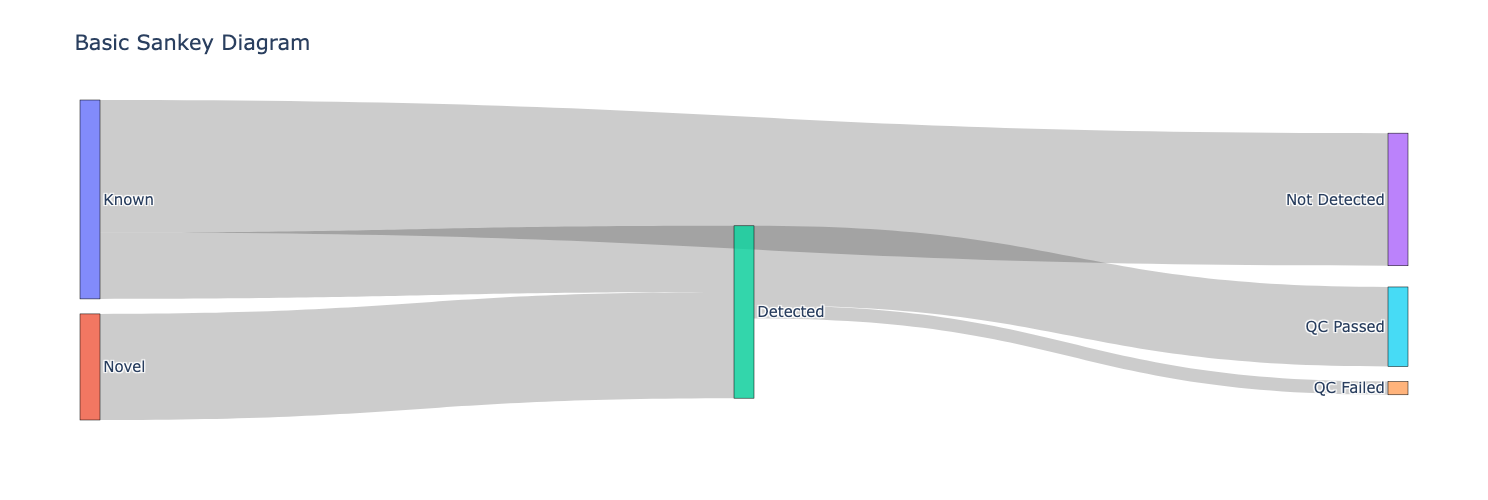

In [31]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['Known','Novel','Detected','Not Detected','QC Failed','QC Passed']
      
    ),
    link = dict(
      source = [0, 0, 1, 2, 2], 
      target = [2, 3, 2, 4, 5],
      value =  [known_inqc,
                q1_and_q2 + q2only + q1only - known_inqc,
                novel_inqc,
                squanti_qc-squanti_rescue,
                squanti_rescue],

  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=15,width=600, height=500)
fig.write_image(figdir + "/sankey_plot.transcript_tracking.png", scale=10)
fig.show()

In [ ]:
known = q1only+q2only+q1_and_q2+novel_inqc
notexp = notexp

detected = squanti_qc
novel = novel_inqc

qc_passed= squanti_rescue
qc_failed = detected - qc_passed

print('known :' + str(known))
print('notexp :' + str(notexp))
print('novel :' + str(novel))
print('detected :' + str(detected))
print('qc_passed :' + str(qc_passed))
print('qc_failed :' + str(qc_failed))

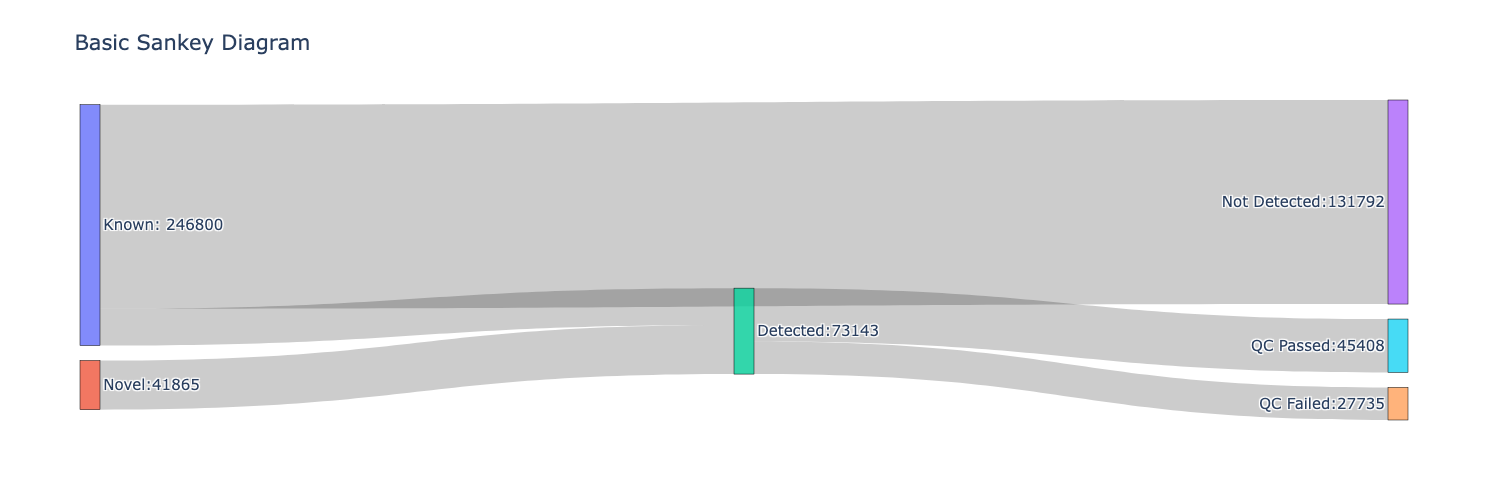

In [37]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ['Known:\n' + str(known),
               'Novel:' + str(novel),
               'Detected:' + str(detected),
               'Not Detected:' + str(notexp),
               'QC Failed:' + str(qc_failed),
               'QC Passed:' + str(qc_passed)]
      
    ),
    link = dict(
      source = [0, 0, 1, 2, 2], 
      target = [2, 3, 2, 4, 5],
      value =  [known_inqc,
                q1_and_q2 + q2only + q1only - known_inqc,
                novel_inqc,
                squanti_qc-squanti_rescue,
                squanti_rescue],

  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=15,width=600, height=500)
# fig.write_image(figdir + "/sankey_plot.transcript_tracking.png", scale=10)
fig.show()

In [17]:
tab = pd.DataFrame(df4.groupby([5]).size()).reset_index()
tab.columns = ['cat','count']
tab['col'] = ['#787A7B','#67A6D3','#515151','#E38E67','#6D4A97','#7AB581','#D8715B']
tab['perc'] = round(tab['count'] * 100 / sum(tab['count']),2)
tab['legend'] = tab['cat'] + ' ' + tab['perc'].astype(str) +  '% (' + tab['count'].astype(str) + ')'

tab

KeyError: 5

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_pie is your DataFrame containing counts and legend information
data = tab['count']
colors = tab['col']

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Plotting the pie chart with specified colors
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(tab['legend'][i], xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment, **kw)
plt.savefig(figdir + '/pie.structure.png', bbox_inches='tight',dpi=300,transparent=True)
plt.show()


In [ ]:
hst = pd.read_csv('/vf/users/Phillippy/projects/HG002_Masseq/06.pantranscriptome/07.hg002v1.0.1/05.quantification/noiseq.result.txt',
                  sep = '\t',
                  header = 0).reset_index()

hst.columns = ['isoform', 'mat_mean', 'pat_mean', 'M', 'D', 'prob', 'ranking']
hst.head()

In [41]:
hst[hst['M'] < 0]

,isoform,mat_mean,pat_mean,M,D,prob,ranking
2,transcript78267.chr1.nnic,242.0,6928.0,-4.839360,6686.0,1.000000,-6686.001751
3,TCONS_00026689,10.0,857.0,-6.421223,847.0,0.999969,-847.024340
4,TCONS_00047762,27.0,720.0,-4.736966,693.0,0.999923,-693.016189
7,TCONS_00022247,0.5,592.0,-10.209453,591.5,0.999861,-591.588102
8,TCONS_00019182,0.5,545.0,-10.090112,544.5,0.999861,-544.593482
...,...,...,...,...,...,...,...
279,transcript14167.chr10.nnic,0.5,14.0,-4.807355,13.5,0.909052,-14.330410
280,TCONS_00027911,4.0,21.0,-2.392317,17.0,0.907615,-17.167504
283,TCONS_00176970,0.5,13.0,-4.700440,12.5,0.901745,-13.354555
284,TCONS_00057873,0.5,13.0,-4.700440,12.5,0.901745,-13.354555


In [32]:
sqanti = df4[[0,5]]
sqanti.columns = ['isoform','structure']
sqanti.head()

,isoform,structure
0,TCONS_00000002,full-splice_match
1,TCONS_00000025,full-splice_match
2,TCONS_00000041,full-splice_match
3,TCONS_00000043,full-splice_match
4,TCONS_00000049,full-splice_match


In [35]:
df6 = pd.merge(sqanti, hst, on ='isoform')

In [37]:
tab

,cat,count
0,full-splice_match,179
1,genic,1
2,incomplete-splice_match,19
3,intergenic,2
4,novel_in_catalog,37
5,novel_not_in_catalog,49


In [38]:
tab = pd.DataFrame(df6.groupby(['structure']).size()).reset_index()
tab.columns = ['cat','count']
tab['col'] = ['#67A6D3','#515151','#E38E67','#6D4A97','#7AB581','#D8715B']
tab['perc'] = round(tab['count'] * 100 / sum(tab['count']),2)
tab['legend'] = tab['cat'] + ' ' + tab['perc'].astype(str) +  '% (' + tab['count'].astype(str) + ')'

tab

,cat,count,col,perc,legend
0,full-splice_match,179,#67A6D3,62.37,full-splice_match 62.37% (179)
1,genic,1,#515151,0.35,genic 0.35% (1)
2,incomplete-splice_match,19,#E38E67,6.62,incomplete-splice_match 6.62% (19)
3,intergenic,2,#6D4A97,0.70,intergenic 0.7% (2)
4,novel_in_catalog,37,#7AB581,12.89,novel_in_catalog 12.89% (37)
5,novel_not_in_catalog,49,#D8715B,17.07,novel_not_in_catalog 17.07% (49)


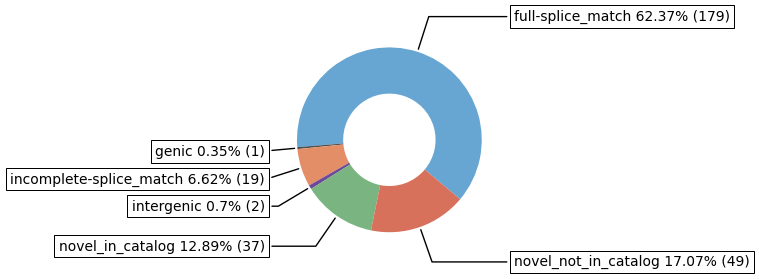

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df_pie is your DataFrame containing counts and legend information
data = tab['count']
colors = tab['col']

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

# Plotting the pie chart with specified colors
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40, colors=colors)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1) / 2.0 + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(tab['legend'][i], xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment, **kw)
plt.savefig(figdir + '/pie.structure.hst.png', bbox_inches='tight',dpi=300,transparent=True)
plt.show()
